## DISTRIBUCIONES<a class="tocSkip">
## EL460 ELECTIVA I - CIENCIA DE DATOS II <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
**joseiglesias@unicesar.edu.co**

---

# Datos


En esta notebook, vamos a realizar una primera aproximación al conjunto de datos. 

* Tipo de Datos
* Distribución de los datos

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [3]:
url = 'https://raw.githubusercontent.com/joseramoniglesias/EL460_Ciencia_de_datos_2/main/Ejercicios/survey_2022_processed.csv'
df = pd.read_csv(url)

In [4]:
df[:3]
len(df)

5854

# Análisis de salarios

Una primera pregunta que se nos puede ocurrir al ver esta encuenta es: **"¿Y cuánto cobran los programadores en un país (Argentina)?"**. (advertencia de sesgo!!! se nos pueden ocurrir muchas más! cuáles?)

Este será nuestro punto de partida para el análisis del conjunto de datos. El proceso total constará de varias iteraciones: a medida que se analicen los datos se descrubrirán otros aspectos relevantes, lo cual disparará nuevas preguntas.

Para conocer más sobre la distribución de los salarios, es necesario elegir una columna de la encuesta para analizar.

In [5]:
salary_col = 'salary_monthly_NETO'

Exploremos la base en realación a estos datos. Una buena forma de comenzar una exploración es a través de la visualización. Seaborn nos provee un tipo de gráfico específico para graficar columnas que contienen números, llamado `displot`. (No confundir con `distplot`, que está deprecado). 

El gráfico generado es un **histograma** de frecuencias. En el eje x se grafican los valores que toma la columna, divididos en intervalos o bins. En el eje y se grafica el conteo de ocurrencias de valores en cada intervalo.

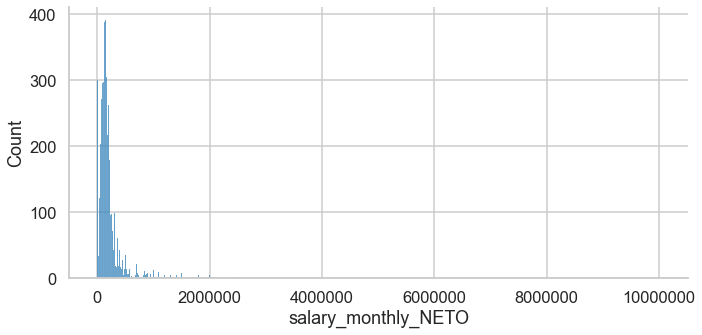

In [6]:
seaborn.displot(df[salary_col], aspect=2) #cambiar los bins=5,20 0 50 y ver...
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')

### ¿Qué estamos viendo?

Las visualizaciones simples son prácticas para conocer la forma de los datos rápidamente, porque condensan mucha información. Por ejemplo:
* El rango de valores tomados por la columna va desde 0 hasta aproximadamente 2M.
* La mayoría de los valores se condensa por debajo de los 250K, y pocos superan los 500K.
* Los valores más frencuentes aparentan estar cerca de los 100K.
* Hay un pico de ocurrencias en el valor 0.
 y brindan poco detalle.


<AxesSubplot:xlabel='count', ylabel='work_province'>

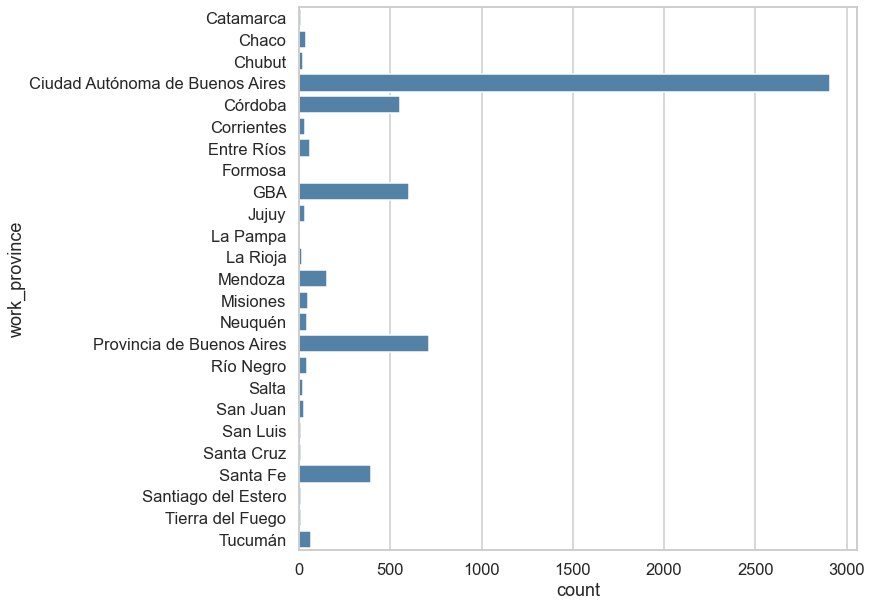

In [7]:
#Conteos de Datos que no son numéricos, datos categóricos. Pueden ser ordinales o no ordinales.
fig = plt.figure(figsize=(10, 10))
seaborn.countplot(y=df.work_province, color='steelblue')

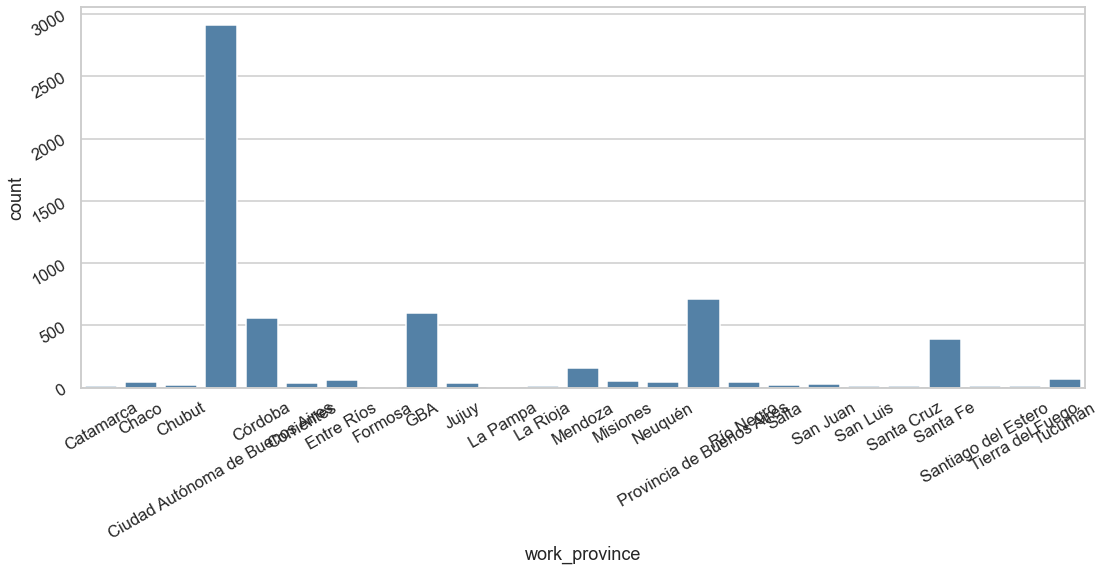

In [8]:
plt.figure(figsize=(18,7))
seaborn.countplot(x=df.work_province, color='steelblue')
plt.tick_params(labelrotation=30)

## Ejercicio: ¿Qué otro tipo de preguntas nos podemos hacer en este punto que no se responden con un histograma?


### Análisis, ¡fundamentado!

Para continuar el análisis, es necesario aplicar herramientas teóricas que nos brinda la Estadística y la Probabilidad.

## Datos y Variables Aleatorias

Podemos considerar que cada columna es un conjunto de datos, que se puede modelar con el concepto matemático de **variable aleatoria**, y que cada dato de esa columna es  una **realización u observación** de dicha variable. 
Habrá datos (o intervalo) más "comunes" o repetidos y datos más atípicos...Ese concepto será modelado como la distribución o densidad de la variable aleatoria. Pero, ¿qué tipo tienen esas variables (o datos)?

### V.A. numéricas, para datos numéricos

El salario, la edad, los años de experiencia, son datos numéricos, serán modelados con variables aleatorias numéricas. Podemos clasificarlas en **continuas** o **discretas**, aunque esa distinción se vuelve difusa cuando trabajamos con datos computacionalmente. ¿Por qué? 

* Datos que en teoría son continuos, se miden de manera discreta. Por ejemplo, los *años* de experiencia, la altura de una persona en *centímetros*.
* Datos que en teoría son continuos, se discretizan a fines prácticos. Por ejemplo, la edad, el salario en pesos argentinos.

Para analizar la distribución de datos continuos (o pseudo contínuos)se usan frecuentemente los histogramas, como en el caso anterior de los sueldos.

**¡Tip!** Antes de graficar, controlar el rango (ya que seaborn intentará crear miles de segmentos si el rango es muy grande) y remover los valores nulos.

In [41]:
# Obtenemos el rango de valores observados de los salarios
df.profile_age.min(), df.profile_age.max()

(11, 333)

Ahora analizamos la edad de los encuestados

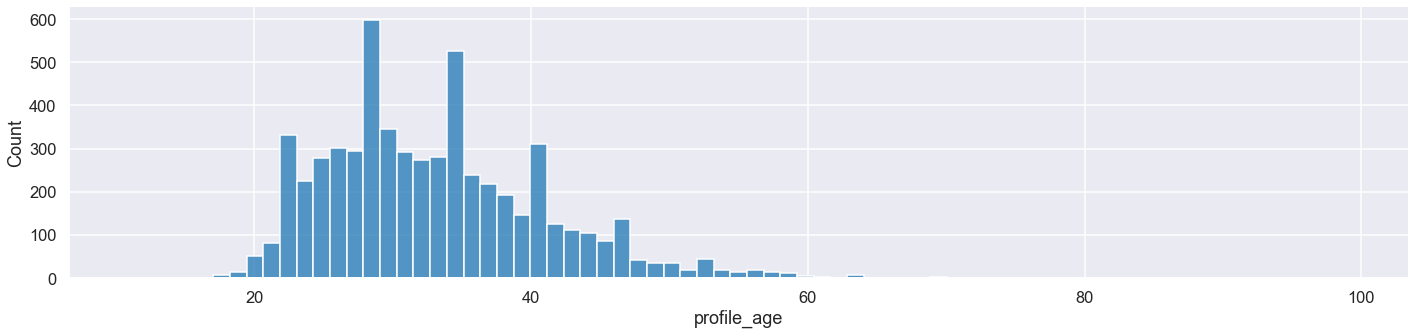

In [42]:
seaborn.displot(df.profile_age[df.profile_age < 100].dropna(),
                 stat='count', aspect=4)

Sin embargo, los histogramas pueden ocultar información. ¿Por qué? Porque agrupan rangos de valores en intervalos inferidos automáticamente. Como resultado, la visualización varía con distintas longitudes de segmentos. Comparemos los siguientes histogramas.

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_18100/1707627301.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


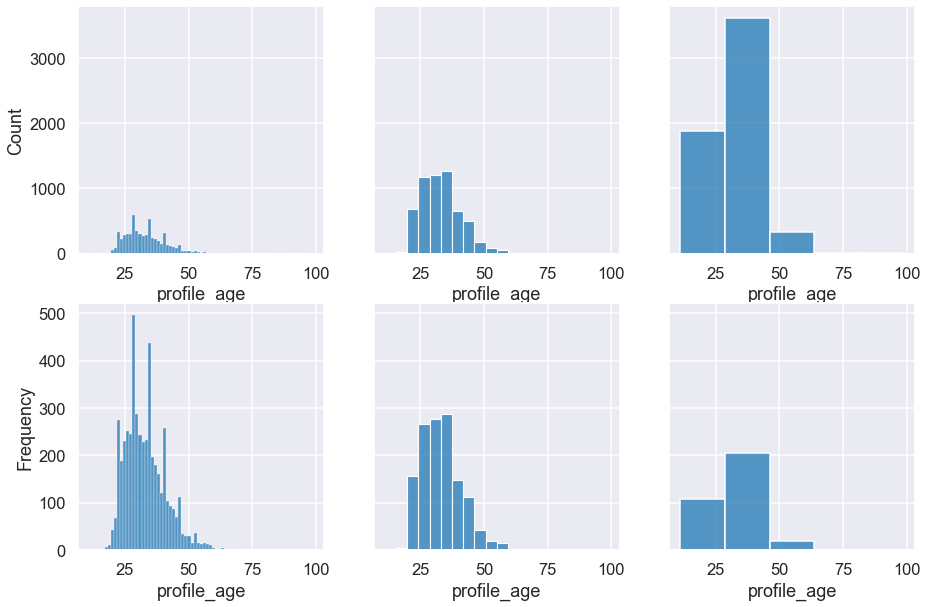

In [43]:
# Un ejemplo más avanzado
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10), sharey='row')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,0],
                 stat='count')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,1],
                 bins=20, stat='count')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,2],
                 bins=5, stat='count')

seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,0],
                 stat='frequency')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,1],
                 bins=20, stat='frequency')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,2],
                 bins=5, stat='frequency')

fig.show()

Para variables discretas puede usarse un gráfico de línea, que permite visualizar el conteo de cada uno de los puntos en el rango observado.



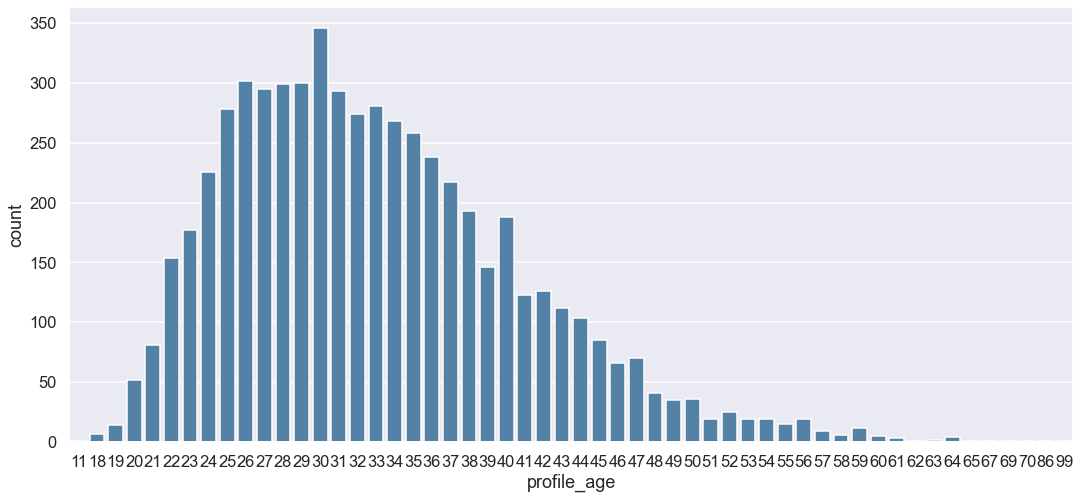

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,8))
seaborn.countplot(x=df.profile_age[df.profile_age < 100] , color='steelblue')
plt.show()

**¿Se puede usar un gráfico de líneas para la variable `salary_montly_NETO`? ¿Tiene sentido?** 

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


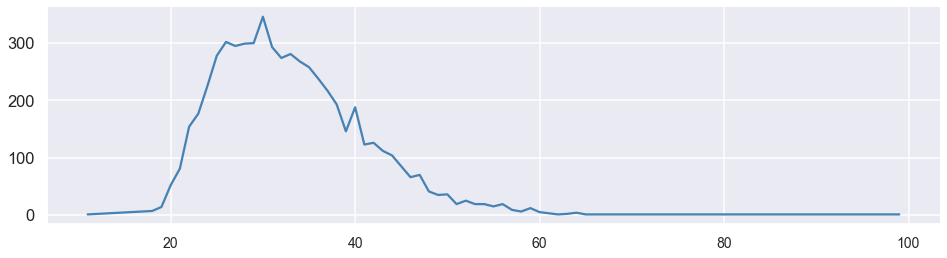

In [45]:
fig = plt.figure(figsize=(16,4))
age_counts = df[df.profile_age < 100].profile_age.value_counts()
seaborn.lineplot(age_counts.index, age_counts.values, color='steelblue')
plt.xticks(fontsize=14)  # Achicamos la letra para que se vea mejor
seaborn.despine()

### V.A. categóricas, para datos categóricos

Las variables categóricas toman valores de un conjunto pre-definido, usualmente pero no necesariamente finito. Para visualizarlas, puede usarse un gráfico de barras, que representa cada valor observado con una columna, y el conteo de ese valor con la altura de la columna.

Las variables numéricas discretas, ¿son categóricas?

In [46]:
df.profile_gender.unique()

array(['Varón Cis', 'Varón Trans', 'Mujer Cis', 'Varón ', 'Mujer Trans',
       'Prefiero no decir', 'Masculino', 'Hombre', 'Fluido',
       'No estoy interiorizado en el tema como para poder decir que me identifico con algún genero.',
       'No binarie', 'hombre', 'Agénero',
       'Masculino. No esos inventos de la actualidad. ', 'Mujer', 'Varon',
       'Hombre ', 'MASCULINO.', 'Varón', 'Varon (no se que es Cis)',
       'comemelaverga', 'Pueden exlicar qué significa cada término?', '.',
       'flaco era de remuneración salarial o de género esta encuesta?',
       'Normal, no se que significa todo eso', 'Varón conservador ',
       'HOMBRE', 'que es cis?',
       'Hombre, no me siento identificado con el resto',
       'Qué complicado todo...',
       'géneros hay sólo 2, el resto son filias',
       'Mujer de nacimiento, tengo vulva', 'Ave', 'Mujer lesbiana',
       'No entiendo la pregunta... Masculino... Déjense de romper los huevos con pelotudeces modernas.',
       'Masculino

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='profile_gender', ylabel='count'>

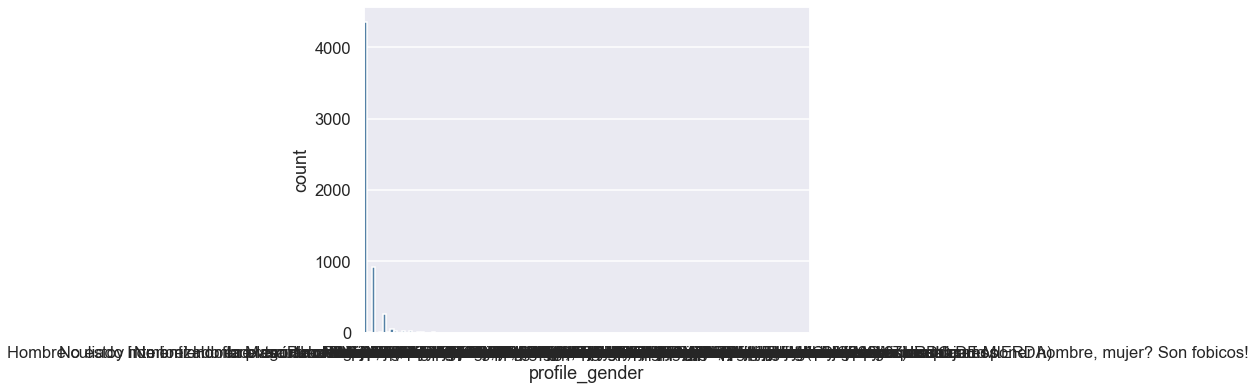

In [47]:
fig = plt.figure(figsize=(8,6))
seaborn.countplot(df.profile_gender, color='steelblue')

Los datos categóricos pueden ser *ordinales*, si existe un orden lógico entre sus valores. 
En caso de que un orden exista, es adecuado incluirlo en el gráfico.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


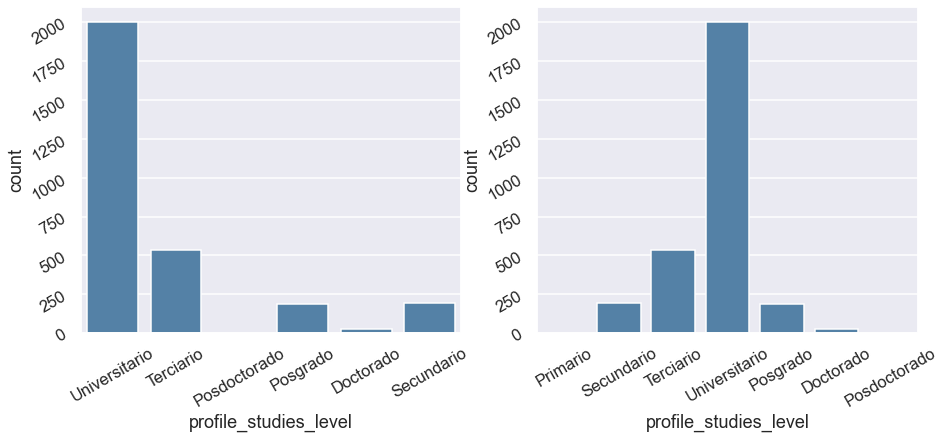

In [48]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[0])
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[1],
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=30)

volver a las Diapositivas
Clase 1 - 2022 - Probabilidad 

### Tipos de datos vs tipos de datos

Tenemos que distinguir dos conceptos con el mismo nombre y significado similar, pero que no son iguales:
 - **tipo de datos - variable aleatoria** es el tipo de valores que venimos hablando (numérico contínuo, numérico discreto, categórico ordinal y categórico no ordinal
 - **tipo de datos (computacional)** es un concepto de programación que indica en qué formato se representa la información. Cuando asignamos a una variable `age` *del programa de Python* una realización de una variable aleatoria conceptual `profile_age`, esa variable `age` también tiene un *tipo de Python*, por ejemplo `int` o `float`.


In [49]:
age = df.profile_age.iloc[0]
type(age)

numpy.int64

*¡Importante!* Hay que tener en cuenta también los límites de la capacidad computacional al momento de representar entidades matemáticas.
* Los números reales siempre son "redondeados" a una representación racional.
* Los tipos básicos como `Int` sólo pueden representar números en un rango, por ejemplo `(-2^31, 2^31)`. Exceder el rango puede tener consecuencias inesperadas, como `integer overflow`.

¿Por qué es importante saberlo? Porque se pueden producir errores de redondeo u obtener resultados aproximados.

In [50]:
print(type(3), type(3.44), type(1/3))  # 1/3 es un numero irracional
import numpy
print(numpy.iinfo('int64').min, numpy.iinfo('int64').max)
numpy.int64(numpy.iinfo('int64').max) + 1
# Traten de hacer numpy.int64(numpy.iinfo('int64').max + 1)

<class 'int'> <class 'float'> <class 'float'>
-9223372036854775808 9223372036854775807


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_18100/2411845908.py:4: RuntimeWarning: overflow encountered in longlong_scalars
  numpy.int64(numpy.iinfo('int64').max) + 1


-9223372036854775808

Se puede acceder a los tipos de datos del DataFrame. El tipo `object` se utiliza para representar cualquier variable que no sea numérica, como por ejemplo los `str`.

In [51]:
df.dtypes[:10]

work_province                       object
work_contract_type                  object
salary_monthly_BRUTO                object
salary_monthly_NETO                float64
salary_in_usd                       object
salary_last_dollar_value            object
salary_satisfaction                  int64
salary_comparison_last_semester      int64
salary_has_bonus                    object
salary_bonus_tied_to                object
dtype: object

Hay que tener en cuenta que las librerías de gráficos nos permitirán crear las visualizaciones que querramos, mientras los tipos de datos sean los adecuados.

Por ejemplo, podemos hacer un histograma con la variable `profile_open_source_contributions` si la transformamos a tipo `bool` (que se representa internamente como un tipo entero). Sin embargo, esto no tiene ningún sentido.

In [52]:
df.loc[:,'salary_in_usd_bool'] = \
  df.salary_in_usd.replace({'Mi sueldo está dolarizado': True}).fillna(False)
print(df.salary_in_usd.unique(), df.salary_in_usd_bool.unique())

[nan 'Mi sueldo está dolarizado (pero cobro en moneda local)'
 'Cobro parte de mi sueldo en otro país, Mi sueldo está dolarizado (pero cobro en moneda local)'
 'Cobro en dólares'
 'Cobro en dólares, Cobro parte de mi sueldo en otro país'
 'Cobro en dólares, Cobro parte de mi sueldo en otro país, Mi sueldo está dolarizado (pero cobro en moneda local)'
 'Cobro parte de mi sueldo en otro país'
 'Cobro en dólares, Mi sueldo está dolarizado (pero cobro en moneda local)'] [False 'Mi sueldo está dolarizado (pero cobro en moneda local)'
 'Cobro parte de mi sueldo en otro país, Mi sueldo está dolarizado (pero cobro en moneda local)'
 'Cobro en dólares'
 'Cobro en dólares, Cobro parte de mi sueldo en otro país'
 'Cobro en dólares, Cobro parte de mi sueldo en otro país, Mi sueldo está dolarizado (pero cobro en moneda local)'
 'Cobro parte de mi sueldo en otro país'
 'Cobro en dólares, Mi sueldo está dolarizado (pero cobro en moneda local)']


ValueError: Unable to parse string "Mi sueldo está dolarizado (pero cobro en moneda local)" at position 2

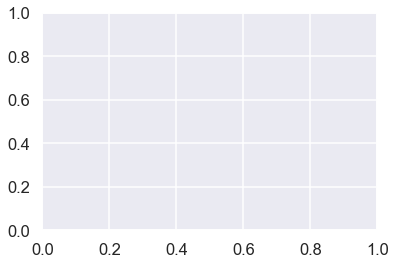

In [53]:
seaborn.histplot(df.salary_in_usd_bool, bins=5)

También podemos graficar la frecuencia de una variable categórica utilizando un gráfico de líneas. **¿Por qué esta visualización no es correcta?**

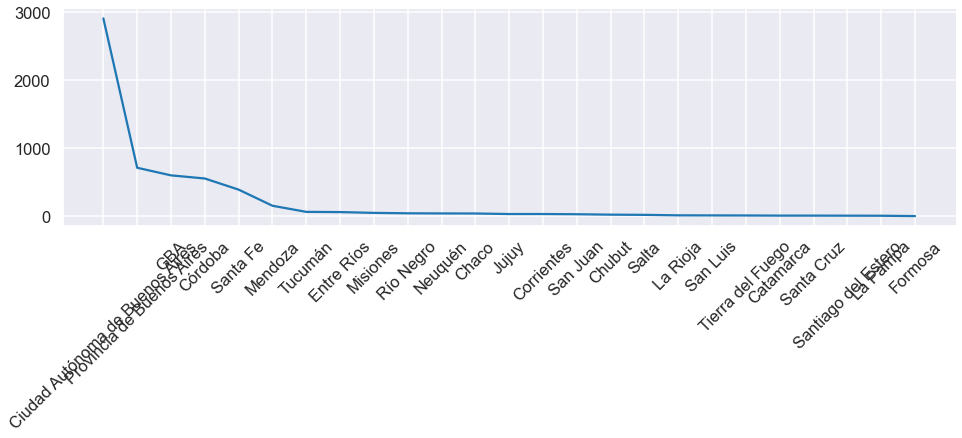

In [54]:
count_by_province = df.work_province.value_counts()
fig = plt.figure(figsize=(16, 4))
seaborn.lineplot(x=count_by_province.index, y=count_by_province.values)
plt.xticks(rotation=45)
seaborn.despine()

Ir a Diapositivas

# Análisis del impacto de los años de experiencia

Ahora que ya sabemos aproximadamente la forma de nuestros datos, podemos pasar a realizar otra pregunta (otra iteración del proceso de análisis): 

**¿Tener más años de experiencia significa que se cobra más?**

Para responder a esta pregunta, analizamos la probabilidad de que un programador tenga un salario mensual mayor que el promedio, cuando tiene una experiencia mayor que 5 años.



## Medida de probabilidad

En el teórico vimos que si cada una de nuestros eventos es independiente e idénticamente distribuido, es decir, que $P(\{\omega_i\})=1/k$, entonces la probabilidad de un conjunto $A \subset \Omega$ es la proporción de $A$, donde .


$$P(\{\omega_i\})=1/k \implies P(A)=|A|/|\Omega|=|A|/k$$


En este problema en particular, $\Omega$ son todas las respuestas del dataset, cada $a_i$ es una variable que representa una respuesta, y el conjunto $A$ son las respuestas (filas) en la que la columna `salary_col` tiene un valor mayor que el promedio


In [55]:
avg_salary = df[salary_col].mean()  #salario promedio
avg_salary

201980.79678351793

In [56]:
prob_above_avg = len(df[df[salary_col] >= avg_salary]) / len(df) #consideramos: "cobrar más"<-> cobrar más que el promedio 
prob_above_avg

0.25708916979842844

* ¿Por qué podemos usar la teoría de la probabilidad?
* ¿Por qué calculamos una probabilidad con esta fórmula?
* ¿Cómo podemos interpretar esta probabilidad?

## Probabilidad condicional

Ahora podemos pasar a hablar de la probabilidad condicional entre los dos eventos. La definimos como

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Esto es equivalente a:

$$P(A|B) = \frac{|A \cap B|}{|B|}$$

## Ejercicio

Responder: **¿Si uno tiene más de 5 años de experiencia, la probabilidad de cobrar más que el promedio aumenta? ¿Estos eventos, son independientes?**


In [57]:
is_above_avg = df[salary_col ]> avg_salary #lista de booleanos
exp_greater_5 = df.profile_years_experience > 5  #lista debooleanos

intersection_count = len(df[is_above_avg & exp_greater_5])
df[is_above_avg & exp_greater_5]

,work_province,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,...,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,work_lastyear_discrimination,¿Salir o seguir contestando?.3,company_days_in_the_office,company_pandemic_support,company_new_benefits,profile_age,profile_gender,salary_in_usd_bool
8,Catamarca,Full-Time,300000,217000.0,NaN,NaN,4,4,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,Varón Cis,False
9,Catamarca,Full-Time,980000,650000.0,NaN,NaN,2,3,De uno a tres sueldos,Performance grupal,...,"Auditiva, Visceral",No,Nunca,Quiero responder más preguntas,2.0,6.0,Almuerzo o delivery de snacks/bebidas (saludab...,50,Mujer Trans,False
17,Chaco,Remoto (empresa de otro país),720000,600000.0,"Cobro en dólares, Cobro parte de mi sueldo en ...",NaN,4,3,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,Varón Cis,"Cobro en dólares, Cobro parte de mi sueldo en ..."
20,Chaco,Full-Time,175000,265000.0,Cobro en dólares,133,3,4,Menos de un sueldo,No se,...,NaN,No,Alguna vez,Quiero responder más preguntas,0.0,5.0,Almuerzo o delivery de snacks/bebidas (saludab...,31,Varón Cis,Cobro en dólares
35,Chaco,Remoto (empresa de otro país),1000000,950000.0,"Cobro en dólares, Cobro parte de mi sueldo en ...",NaN,4,4,Menos de un sueldo,Fin de año,...,NaN,Sí,Alguna vez,Quiero responder más preguntas,0.0,8.0,Ninguna de las anteriores,48,Mujer Cis,"Cobro en dólares, Cobro parte de mi sueldo en ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5822,Tucumán,Full-Time,375000,250000.0,NaN,NaN,2,3,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Mujer Cis,False
5826,Tucumán,Remoto (empresa de otro país),1200000,960000.0,Cobro en dólares,200,4,4,No,No recibo bono,...,NaN,No,Nunca,Quiero responder más preguntas,0.0,8.0,Ninguna de las anteriores,39,Varón Cis,Cobro en dólares
5831,Tucumán,Full-Time,637245,519890.0,Cobro en dólares,NaN,4,4,Un sueldo,catorceavo sueldo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,Varón Cis,Cobro en dólares
5835,Tucumán,Remoto (empresa de otro país),800000,750000.0,Cobro en dólares,210,4,4,3+ sueldos,Performance individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Varón Cis,Cobro en dólares


In [58]:
p_condic_above_avg = len(df[is_above_avg & exp_greater_5])/len(df[exp_greater_5])
print(p_condic_above_avg)
print(prob_above_avg)

0.396700143472023
0.25708916979842844


Respuesta:
No son independientes , no son iguales P(A|B) y P(A)...

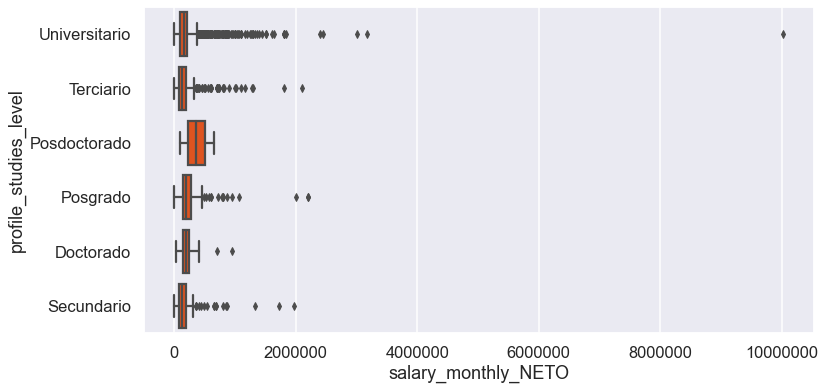

In [59]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

Completar...